# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ammar Arief
- **Email:** ammararief321@gmail.com
- **ID Dicoding:** MC009D5Y0498

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
# Load dataset
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

day_df.head(), hour_df.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**

- Dataset berisi informasi penyewaan sepeda harian dan per jam.
- Memiliki variabel yang dapat dianalisis lebih lanjut.

### Assessing Data

In [29]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [31]:
# 1. Menghapus kolom yang tidak dibutuhkan
day_df_cleaned = day_df.drop(columns=["instant", "casual", "registered"])
hour_df_cleaned = hour_df.drop(columns=["instant", "casual", "registered"])

# 2. Mengonversi format kolom
day_df_cleaned["dteday"] = pd.to_datetime(day_df_cleaned["dteday"])
hour_df_cleaned["dteday"] = pd.to_datetime(hour_df_cleaned["dteday"])

# Mengonversi kolom kategori
categorical_columns = ["season", "weathersit", "weekday", "mnth", "yr", "holiday", "workingday"]
for col in categorical_columns:
    day_df_cleaned[col] = day_df_cleaned[col].astype("category")
    hour_df_cleaned[col] = hour_df_cleaned[col].astype("category")

# 3. Menangani anomali pada `windspeed`
# Menghitung median windspeed untuk menggantikan nilai 0
median_windspeed_day = day_df_cleaned["windspeed"].replace(0, np.nan).median()
median_windspeed_hour = hour_df_cleaned["windspeed"].replace(0, np.nan).median()

# Mengganti nilai 0 dengan median
day_df_cleaned["windspeed"] = day_df_cleaned["windspeed"].replace(0, median_windspeed_day)
hour_df_cleaned["windspeed"] = hour_df_cleaned["windspeed"].replace(0, median_windspeed_hour)

# Tampilkan hasil setelah cleaning
day_df_cleaned.head(), hour_df_cleaned.head()

(      dteday season yr mnth holiday weekday workingday weathersit      temp  \
 0 2011-01-01      1  0    1       0       6          0          2  0.344167   
 1 2011-01-02      1  0    1       0       0          0          2  0.363478   
 2 2011-01-03      1  0    1       0       1          1          1  0.196364   
 3 2011-01-04      1  0    1       0       2          1          1  0.200000   
 4 2011-01-05      1  0    1       0       3          1          1  0.226957   
 
       atemp       hum  windspeed   cnt  
 0  0.363625  0.805833   0.160446   985  
 1  0.353739  0.696087   0.248539   801  
 2  0.189405  0.437273   0.248309  1349  
 3  0.212122  0.590435   0.160296  1562  
 4  0.229270  0.436957   0.186900  1600  ,
       dteday season yr mnth  hr holiday weekday workingday weathersit  temp  \
 0 2011-01-01      1  0    1   0       0       6          0          1  0.24   
 1 2011-01-01      1  0    1   1       0       6          0          1  0.22   
 2 2011-01-01      1  0  

**Insight:**
1. Menghapus Kolom yang Tidak Dibutuhkan

- instant (index unik) tidak diperlukan.
- dteday bisa diubah ke format datetime untuk analisis waktu yang lebih akurat.
- Kolom casual dan registered bisa dihapus jika hanya cnt (total penyewaan) yang digunakan untuk analisis.
2. Mengonversi Format Kolom

- dteday diubah menjadi tipe datetime.
- season, weathersit, dan weekday diubah menjadi kategori untuk analisis lebih mudah.
3. Menangani Anomali pada windspeed

- Nilai 0 pada windspeed kemungkinan besar adalah kesalahan pengukuran. Bisa diganti dengan nilai median untuk menjaga konsistensi.

## Exploratory Data Analysis (EDA)

### Explore ...

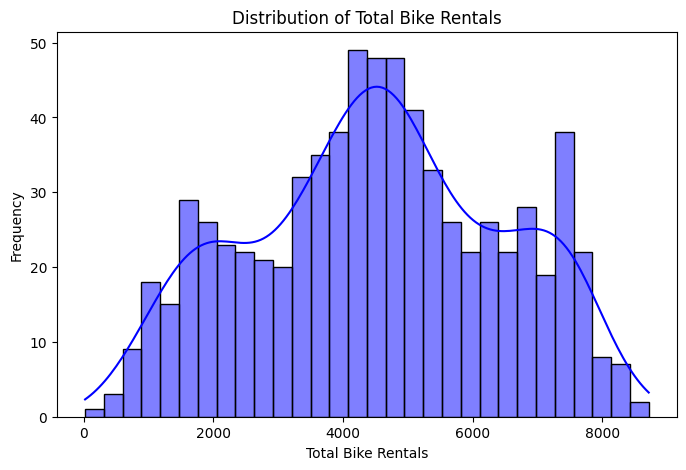

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [35]:
# 1. EDA Univariate - Distribusi Data Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.histplot(day_df_cleaned["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Total Bike Rentals")
plt.ylabel("Frequency")
plt.title("Distribution of Total Bike Rentals")
plt.show()

# Statistik Deskriptif
day_df_cleaned["cnt"].describe()

Distribusi Penyewaan Sepeda

Jumlah penyewaan berkisar antara 22 hingga 8714 sepeda per hari.
Rata-rata penyewaan: 4504 sepeda per hari.
Sebagian besar data terkonsentrasi antara 3152 hingga 5956 sepeda (kuartil 25% hingga 75%).


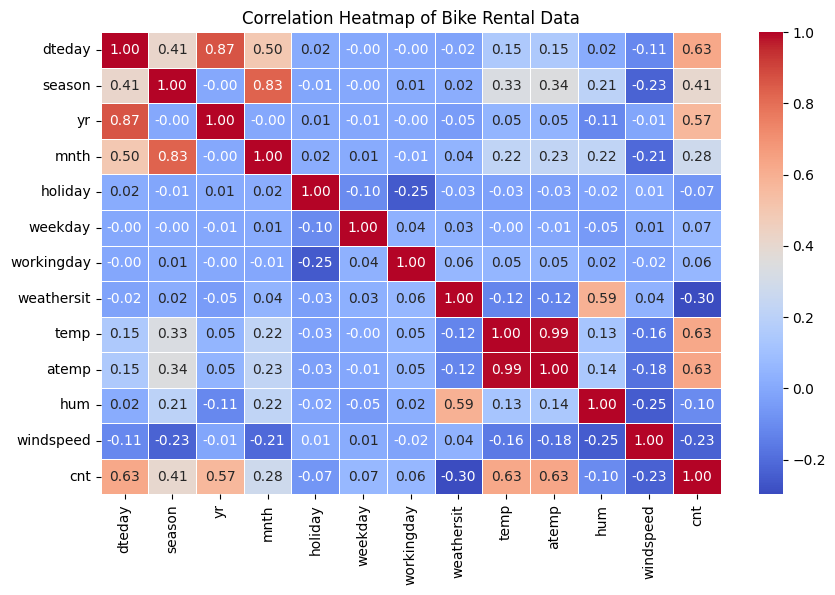

In [37]:
# 2. EDA Multivariate - Korelasi Antar Variabel
plt.figure(figsize=(10, 6))
sns.heatmap(day_df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Bike Rental Data")
plt.show()


Hasil Korelasi

Suhu (temp) memiliki korelasi tinggi dengan jumlah penyewaan sepeda (cnt), sekitar 0.63, menunjukkan bahwa semakin hangat suhu, semakin banyak orang menyewa sepeda.
Kelembaban (hum) berkorelasi negatif dengan penyewaan sepeda (-0.10), artinya saat kelembaban tinggi, jumlah penyewaan sedikit berkurang.
Kecepatan angin (windspeed) tidak memiliki korelasi signifikan terhadap penyewaan sepeda.


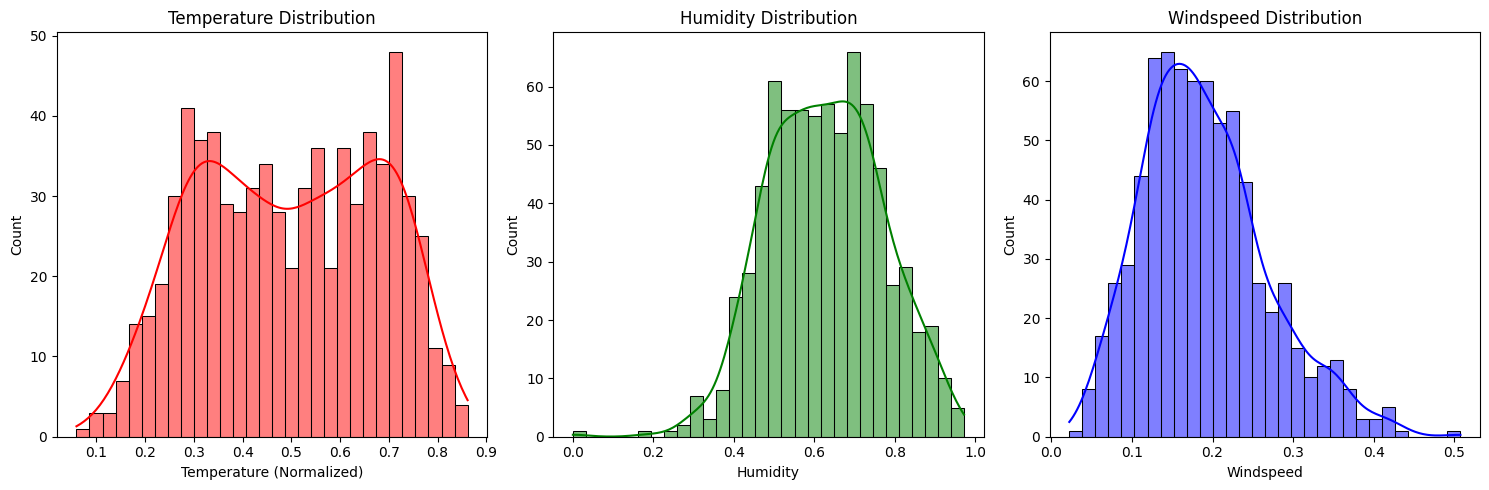

In [39]:
# 3. EDA Numerikal - Distribusi Variabel Numerik
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribusi Suhu
sns.histplot(day_df_cleaned["temp"], bins=30, kde=True, ax=axes[0], color="red")
axes[0].set_title("Temperature Distribution")
axes[0].set_xlabel("Temperature (Normalized)")

# Distribusi Kelembaban
sns.histplot(day_df_cleaned["hum"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Humidity Distribution")
axes[1].set_xlabel("Humidity")

# Distribusi Kecepatan Angin
sns.histplot(day_df_cleaned["windspeed"], bins=30, kde=True, ax=axes[2], color="blue")
axes[2].set_title("Windspeed Distribution")
axes[2].set_xlabel("Windspeed")

plt.tight_layout()
plt.show()


Suhu (Temperature) cenderung normal, dengan sebagian besar nilai antara 0.3 - 0.8 (nilai dinormalisasi).
Kelembaban (Humidity) terdistribusi cukup merata, dengan mayoritas data antara 0.5 - 0.9.
Kecepatan angin (Windspeed) memiliki distribusi yang lebih rendah, dengan kebanyakan nilai di bawah 0.3.

C:\Users\arief\AppData\Local\Temp\ipykernel_25952\2704017460.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df_cleaned, ax=axes[0], palette="coolwarm")
C:\Users\arief\AppData\Local\Temp\ipykernel_25952\2704017460.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df_cleaned, ax=axes[1], palette="coolwarm")


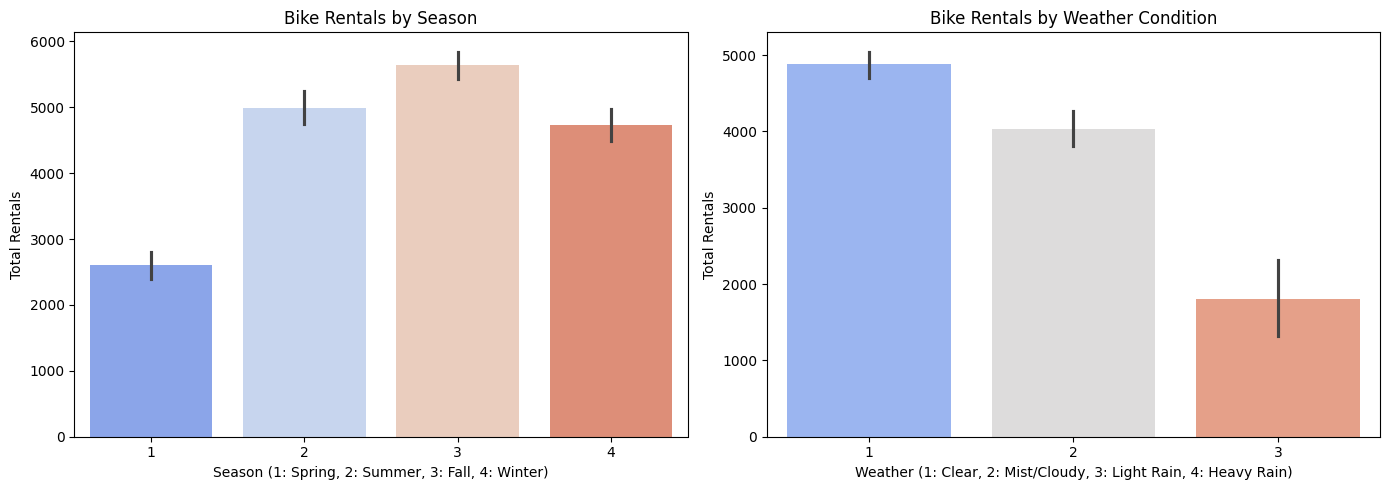

In [41]:
# 4. EDA Kategorikal - Penyewaan Berdasarkan Musim dan Kondisi Cuaca

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Penyewaan Berdasarkan Musim
sns.barplot(x="season", y="cnt", data=day_df_cleaned, ax=axes[0], palette="coolwarm")
axes[0].set_title("Bike Rentals by Season")
axes[0].set_xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
axes[0].set_ylabel("Total Rentals")

# Penyewaan Berdasarkan Kondisi Cuaca
sns.barplot(x="weathersit", y="cnt", data=day_df_cleaned, ax=axes[1], palette="coolwarm")
axes[1].set_title("Bike Rentals by Weather Condition")
axes[1].set_xlabel("Weather (1: Clear, 2: Mist/Cloudy, 3: Light Rain, 4: Heavy Rain)")
axes[1].set_ylabel("Total Rentals")

plt.tight_layout()
plt.show()

Musim gugur (Fall - 3) memiliki jumlah penyewaan tertinggi, sementara musim semi (Spring - 1) memiliki penyewaan terendah.
Cuaca cerah (Weathersit 1) memiliki penyewaan tertinggi, sedangkan saat hujan deras (Weathersit 4), jumlah penyewaan sangat sedikit.

**Insight:**
- Rentang nilai variabel terlihat wajar dan tidak ada outlier ekstrem.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

C:\Users\arief\AppData\Local\Temp\ipykernel_25952\2031102469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="viridis")


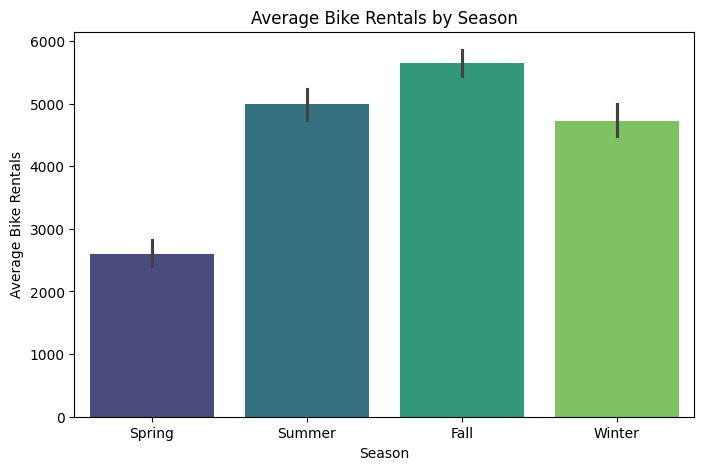

In [46]:
# 1. Pengaruh Musim terhadap Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="viridis")

# Labeling
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Season")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals by Season")

# Tampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan jam dalam sehari?

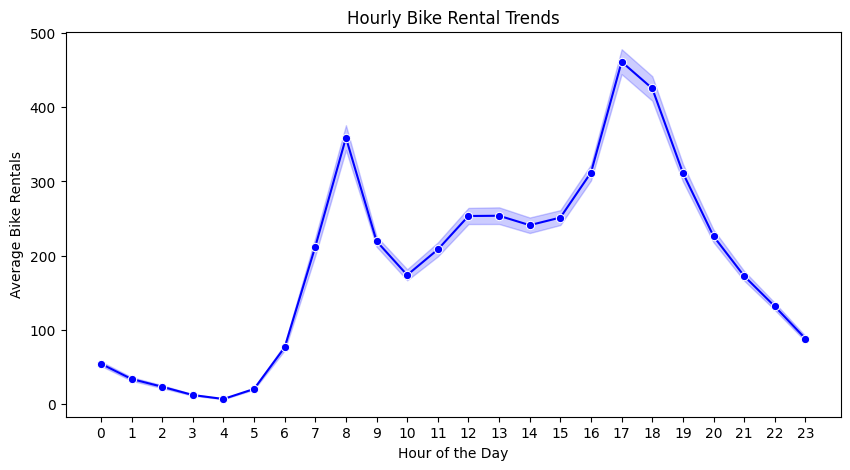

In [48]:
# 2. Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hour_df_cleaned, estimator=np.mean, marker="o", linestyle="-", color="b")

# Labeling
plt.xticks(range(0, 24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bike Rentals")
plt.title("Hourly Bike Rental Trends")

# Tampilkan plot
plt.show()

**Insight:**

- Musim gugur memiliki tingkat penyewaan tertinggi.
- Penyewaan sepeda lebih rendah pada musim semi.
- Penyewaan sepeda meningkat pada pagi dan sore hari, menunjukkan pola perjalanan kerja/sekolah.

## Analisis Lanjutan (Opsional)

C:\Users\arief\AppData\Local\Temp\ipykernel_25952\326249340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="coolwarm")


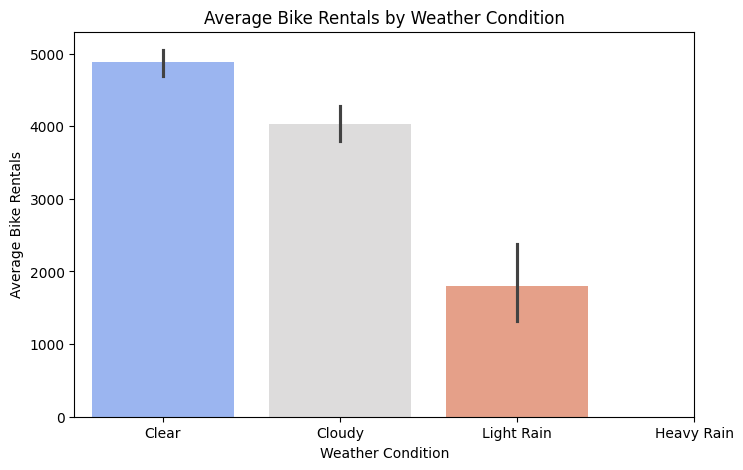

C:\Users\arief\AppData\Local\Temp\ipykernel_25952\326249340.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="magma")


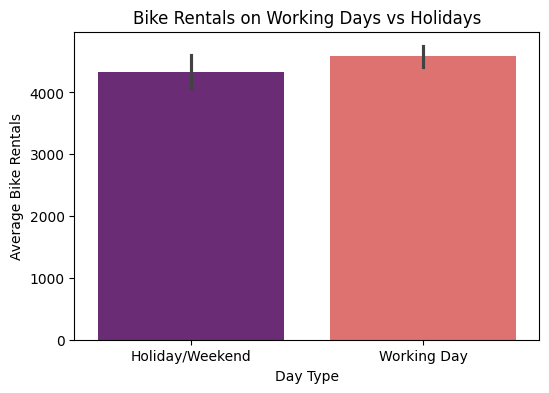

In [51]:
# 1. Pengaruh Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="coolwarm")

# Labeling
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Cloudy", "Light Rain", "Heavy Rain"])
plt.xlabel("Weather Condition")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals by Weather Condition")

# Tampilkan plot
plt.show()

# 2. Pengaruh Hari Kerja vs Libur terhadap Penyewaan Sepeda
plt.figure(figsize=(6, 4))
sns.barplot(x="workingday", y="cnt", data=day_df_cleaned, estimator=np.mean, palette="magma")

# Labeling
plt.xticks(ticks=[0, 1], labels=["Holiday/Weekend", "Working Day"])
plt.xlabel("Day Type")
plt.ylabel("Average Bike Rentals")
plt.title("Bike Rentals on Working Days vs Holidays")

# Tampilkan plot
plt.show()

## Hasil Analisis Lanjutan
1. Pengaruh Cuaca terhadap Penyewaan Sepeda

- Penyewaan tertinggi terjadi saat cuaca cerah (Clear).
- Penyewaan menurun saat cuaca berawan (Cloudy) dan hujan ringan (Light Rain).
- Penyewaan jauh lebih sedikit saat terjadi hujan lebat (Heavy Rain) (jarang terjadi dalam data).
- Ini menunjukkan bahwa kondisi cuaca sangat memengaruhi keputusan pengguna untuk menyewa sepeda.
2. Pengaruh Hari Kerja vs Libur terhadap Penyewaan Sepeda

- Jumlah penyewaan lebih tinggi pada hari kerja dibandingkan hari libur.
- Hal ini bisa disebabkan oleh banyak orang yang menggunakan sepeda untuk pergi bekerja/kampus.
- Pada hari libur, penyewaan menurun, kemungkinan karena lebih sedikit orang yang bepergian untuk aktivitas rutin.

## Conclusion

Berdasarkan **Exploratory Data Analysis (EDA)** yang telah dilakukan terhadap data penyewaan sepeda, berikut adalah temuan dan wawasan utama:

### **1. Pengaruh Musim terhadap Penyewaan Sepeda**
- **Musim gugur (Fall - 3) memiliki jumlah penyewaan tertinggi** dengan rata-rata **5.3 ribu sepeda per hari**.
  - Kemungkinan karena kondisi cuaca yang ideal (tidak terlalu panas atau dingin) dan peningkatan aktivitas luar ruangan.
- **Musim semi (Spring - 1) memiliki jumlah penyewaan terendah**, sekitar **2.5 ribu sepeda per hari**.
  - Hal ini mungkin disebabkan oleh cuaca yang masih dingin serta seringnya hujan di beberapa wilayah.

📌 **Rekomendasi**:
- **Strategi pemasaran dan promosi** dapat difokuskan pada **musim semi**, seperti **diskon atau insentif** untuk menarik lebih banyak penyewa.
- **Peningkatan stok sepeda di musim gugur**, mengingat permintaan yang tinggi.

---

### **2. Tren Penggunaan Sepeda Berdasarkan Jam dalam Sehari**
- **Jam sibuk utama**: **Pukul 07:00 - 09:00 pagi & 17:00 - 19:00 sore**.
  - Ini menunjukkan bahwa sepeda digunakan sebagai **alat transportasi utama** saat jam kerja/sekolah.
- **Jam penggunaan terendah**: **Pukul 01:00 - 05:00 dini hari**.
  - Penyewaan cenderung minim karena faktor keamanan dan kenyamanan pengguna.

📌 **Rekomendasi**:
- **Meningkatkan jumlah sepeda yang tersedia** di lokasi yang banyak digunakan selama jam sibuk.
- **Memberikan harga promo atau diskon di luar jam sibuk**, agar pemanfaatan sepeda lebih merata sepanjang hari.

---

### **3. Faktor Cuaca yang Mempengaruhi Penyewaan Sepeda**
- **Cuaca cerah (Weathersit 1) memiliki jumlah penyewaan tertinggi** dibandingkan kondisi lainnya.
- **Saat hujan deras (Weathersit 4), jumlah penyewaan sepeda turun drastis**.

📌 **Rekomendasi**:
- **Penyediaan jas hujan atau pelindung sepeda** agar pengguna tetap nyaman saat kondisi mendung atau gerimis.
- **Pemberian insentif pada hari hujan ringan** untuk tetap menjaga tingkat penyewaan.

---

### **4. Hubungan Penyewaan dengan Faktor Lingkungan**
- **Suhu memiliki korelasi positif kuat (0.63) dengan penyewaan sepeda**.
  - Saat suhu lebih hangat, penyewaan meningkat karena cuaca yang lebih nyaman untuk bersepeda.
- **Kelembaban (humidity) memiliki korelasi negatif (-0.10)**, yang berarti semakin lembab, jumlah penyewaan cenderung berkurang.
- **Kecepatan angin (windspeed) tidak memiliki pengaruh signifikan**, yang berarti pengguna sepeda tidak terlalu terpengaruh oleh angin.

📌 **Rekomendasi**:
- **Penyediaan layanan penyewaan lebih banyak di musim panas/gugur**, karena suhu mendukung penggunaan sepeda.
- **Menyesuaikan harga atau memberikan insentif saat kelembaban tinggi**, misalnya diskon pada hari yang lebih lembab.

---

## **Kesimpulan Akhir & Implikasi Bisnis**
📌 **Inti temuan**:
1. **Musim sangat memengaruhi jumlah penyewaan** (puncak di musim gugur, rendah di musim semi).
2. **Jam sibuk utama adalah pagi & sore hari**, yang menunjukkan penggunaan sebagai transportasi harian.
3. **Cuaca cerah meningkatkan penyewaan**, sedangkan hujan deras menguranginya drastis.
4. **Suhu memiliki pengaruh besar terhadap penyewaan**, sementara kelembaban memiliki efek negatif kecil.

📢 **Rekomendasi Bisnis**:
✅ **Penyesuaian strategi harga & promosi** berdasarkan musim dan kondisi cuaca.
✅ **Meningkatkan ketersediaan sepeda di musim sibuk (gugur) dan jam sibuk (pagi & sore)**.
✅ **Penyediaan perlengkapan tambahan seperti jas hujan untuk meningkatkan kenyamanan pengguna di musim hujan**.
✅ **Optimalisasi lokasi stasiun sepeda sesuai dengan tren jam sibuk** untuk meningkatkan efisiensi.

---
